## Test QMI vs MI

In [1]:
import sys
import os
sys.path.insert(0, os.path.abspath('../../'))

import numpy as np
import theano.tensor as T
from theano import function, shared, config
from sklearn.metrics import mutual_info_score

from deepensemble.utils.utils_functions import ITLFunctions

## Plot differents way to compute Muntual Informations 

In [2]:
N = 200
y1 = np.random.binomial(1, 0.5, (N, 1)).astype(dtype=config.floatX)

_y2 = T.matrix('y2')
s = 1.06 * np.std(y1) * (len(y1)) ** (-0.2)  # Silverman

# noinspection PyTypeChecker
_Ip = ITLFunctions.mutual_information_parzen(_y2, shared(y1), s=s)
fn_Ip = function([_y2], outputs=_Ip, allow_input_downcast=True)

_Ics = ITLFunctions.mutual_information_cs([_y2], shared(y1), s=np.sqrt(2) * s)
fn_Ics = function([_y2], outputs=_Ics, allow_input_downcast=True)

_Ied = ITLFunctions.mutual_information_ed([_y2], shared(y1), s=np.sqrt(2) * s)
fn_Ied = function([_y2], outputs=_Ied, allow_input_downcast=True)

Ics = []
Ied = []
Ip = []
AUC = np.linspace(0, 1, 101)
for auc in AUC:
    y2 = y1.copy()
    m = int(auc * N)
    y2[:m] = 1 - y2[:m]

    Ip.append(fn_Ip(y2))
    Ics.append(fn_Ics(y2))
    Ied.append(fn_Ied(y2))

<IPython.core.display.Javascript object>


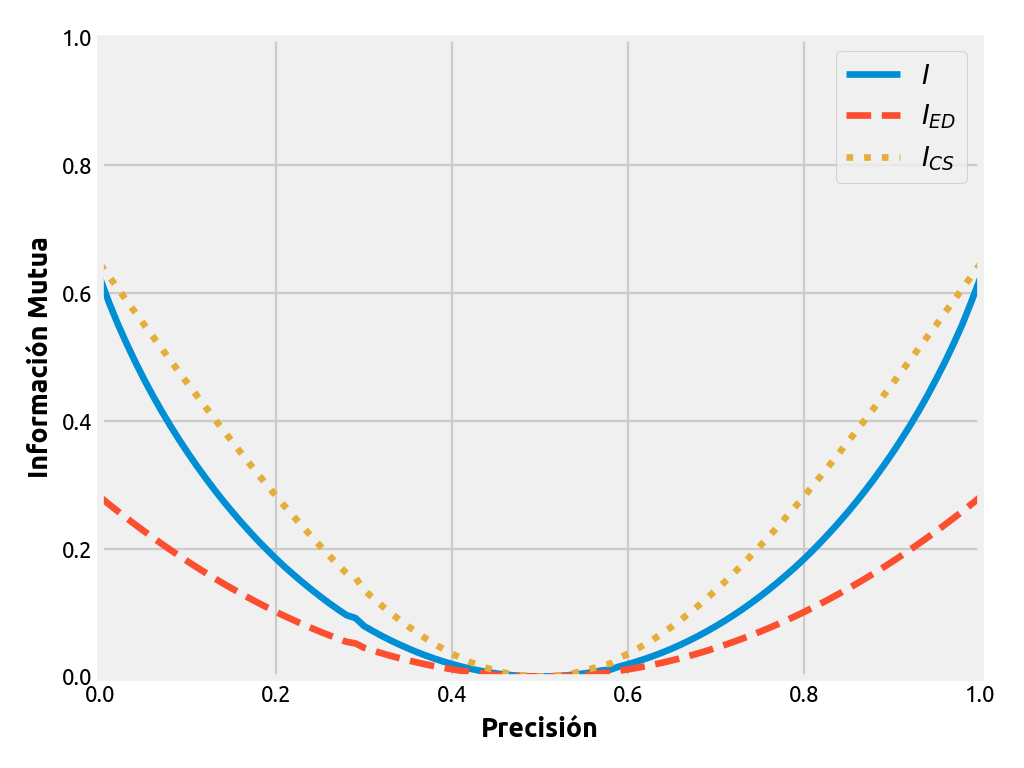

In [3]:
%matplotlib notebook
import matplotlib.pyplot as plt

plt.style.use('fivethirtyeight')

plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = 'Ubuntu'
plt.rcParams['font.monospace'] = 'Ubuntu Mono'
plt.rcParams['font.size'] = 12
plt.rcParams['axes.labelsize'] = 12
plt.rcParams['axes.labelweight'] = 'bold'
plt.rcParams['axes.titlesize'] = 14
plt.rcParams['xtick.labelsize'] = 10
plt.rcParams['ytick.labelsize'] = 10
plt.rcParams['legend.fontsize'] = 12
plt.rcParams['figure.titlesize'] = 14
plt.rcParams['lines.linewidth'] = 3

f = plt.figure(dpi=80)

plt.plot(AUC, Ip,  linestyle='-', label='$I$')
plt.plot(AUC, Ied, linestyle='--', label='$I_{ED}$')
plt.plot(AUC, Ics, linestyle=':', label='$I_{CS}$')
plt.xlabel('Precisión')
plt.ylabel('Información Mutua')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.legend()

plt.tight_layout()

plt.show()